<a href="https://colab.research.google.com/github/a-forty-two/diamler_17_jan/blob/main/02_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
print('Earliest = ' + str(data['Order Date'].min()))
print('Last ord = ' + str(data['Order Date'].max()))
# Jan 1,2 2014, Dec 31 2017=? Missing in the extremes of dataset


Earliest = 2014-01-03 00:00:00
Last ord = 2017-12-30 00:00:00


In [ ]:
smalldata = data.loc[:, ['Order Date','Category','Sales','Quantity','Discount'	,'Profit']]

In [ ]:
smalldata.shape

(9994, 6)

In [ ]:
for colname in smalldata.columns:
  print(colname + ' : ' + str(smalldata[colname].value_counts().count()))
  # prints all unique values' count inside column

Order Date : 1237
Category : 3
Sales : 6144
Quantity : 14
Discount : 12
Profit : 7545


In [ ]:
smalldata['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
# let's pick any one category 
usefuldata = smalldata[smalldata['Category']=='Furniture']
usefuldata.head()

,Order Date,Category,Sales,Quantity,Discount,Profit
0,2016-11-08,Furniture,261.9600,2,0.00,41.9136
1,2016-11-08,Furniture,731.9400,3,0.00,219.5820
3,2015-10-11,Furniture,957.5775,5,0.45,-383.0310
5,2014-06-09,Furniture,48.8600,7,0.00,14.1694
10,2014-06-09,Furniture,1706.1840,9,0.20,85.3092


In [ ]:
usefuldata.shape

(2121, 6)

In [ ]:
usefuldata['Order Date'].value_counts().count()

889

In [ ]:
# we already know that our data spans from 3 Jan 2014 to 30 Dec 2017
# 365.25 X 4 years - missing days
# 1461 - 3 = 1458 unique were expected!
# but we have only 889
# this means that multiple orders are placed on same date!

In [ ]:
dailyfurnituredata = usefuldata.groupby('Order Date').sum()
dailyfurnituredata.tail()
# No orders present for Dec 26,27,31-> these are MISSING VALUES!
# because of this-> we cannot make daily predictions!
# Observe-> Order Date (because of groupby) has been set as index to avoid repeating values!

,Sales,Quantity,Discount,Profit
Order Date,,,,
2017-12-24,1393.4940,14,0.50,222.9092
2017-12-25,832.4540,14,0.80,-7.0763
2017-12-28,551.2568,17,2.02,-49.6680
2017-12-29,2330.7180,26,0.20,492.6236
2017-12-30,323.1360,4,0.20,12.1176


In [ ]:
# last week-> time grouping-> resample -> AS, MS
# convert -> daily data (sum of all cols on that date) to MONTHLY data!
# aggregation SHOULD not be SUM-> because MONTHS are NOT of the same length!
# comparison should always be on same scale-> MEAN
# average sales per day of that month

In [ ]:
# 10AS-> 10*Annual Sum-> decade sum
# MS-> Monthly sum
monthlyfurnituredata = dailyfurnituredata.resample('MS').mean()
monthlyfurnituredata.head()

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-01,480.194231,5.384615,0.207692,61.958962
2014-02-01,367.931600,4.600000,0.160000,24.138340
2014-03-01,857.291529,7.705882,0.447059,-66.391471
2014-04-01,567.488357,5.785714,0.246429,39.598579
2014-05-01,432.049187,6.062500,0.384375,-21.867350


In [ ]:
# by logic-> 4 years-> 12 X 4 = 48 rows
monthlyfurnituredata.shape
# this time there are NO missing values!
# because data is monthly, our predictions will also be MONTHLY!
# if we were making daily, weekly, monthly predictions
# we would have made most mistakes in daily predictions


(48, 4)

<Figure size 432x288 with 0 Axes>

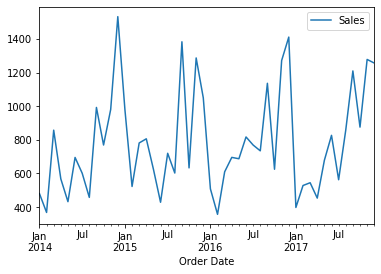

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
monthlyfurnituredata[['Sales']].plot()
plt.show()


In [ ]:
# instead of solving 1 complex graph
# break it into 3 simpler graphs
# Graphs follow vector math
# Graph A( 2,2) can be broken into Graph B (1,1) and C (1,1)
# graph A = graph b + graph c
# axis-> i and j
# grpah A-> 2i + 2j
# graph B -> i + j; graph d-> 4i + 3j
# graph C -> i + j; graph e-> -2i - j
# graph A = graph B + graph C
# or graph A = graph d + graph e
# decomposing the graph!

# our graph follow time series
# slope of the graph-> dy/dt the entire graph!-> tells you the direction of series
# season or period-> data thats repeating across entire graph
#         original - slope = a new graph
#         in this new graph-> vector that can be added to entire graph to create a pattern
#         -> patterns that's repeating 
# noise or residue-> external factors that impact our data
#         -> original - slope - season
#         -> whatever's left!!!
# slope + season + noise = original graph

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


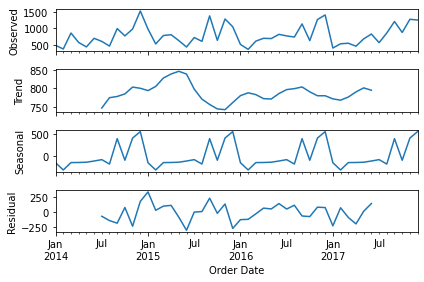

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(monthlyfurnituredata[['Sales']], model='additive')
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

fig = decomposition.plot()
plt.show() 

In [1]:
# 3 graphs-> Trend, Seasonal, Residue 
# ARIMA-> Auto Regression integrated Moving Averages 

In [ ]:
# p,d,q -> p -> autoregressive terms 
# d-> not impacted by season
# q-> lagged forecast errors 

In [2]:
# we do not know which combinations here to pick
# thus, we are going to try ALL combinations

In [4]:
# paramters- provided by the data
# hyperparameters- set by the developer
# OUR HP- ARIMA-> p,d,q, use Trend?, use Season?, use Residue?

In [ ]:
# exhaustive search to generate all possible combinations of these HPs
# Grid Search -> exhaustive generation of all possible HP combinations 
# gives you the metric for each combination
# then we select the best metric!

#alternate approaches:
# 1) Randomized Search-> some problems are infinite. We cannot generate ALL possible 
# combinations. Thats why we generate a random subset of HPs, and then select
# a workable HP set from the random values.
# this does not give us best HP, but workable ones!

# 2) Bayesian Search-> next set of HP such that they are 'probabilistically' better
# than the previous selection 